In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_ft_z = pd.read_csv(os.path.join(folder_path, "features_combined_ft_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_ft_mm = pd.read_csv(os.path.join(folder_path, "features_combined_ft_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_ft_mm_cl= df_combined_ft_mm.drop(columns=['filename', 'label' ])
df_combined_ft_z_cl= df_combined_ft_z.drop(columns=['filename', 'label'])


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

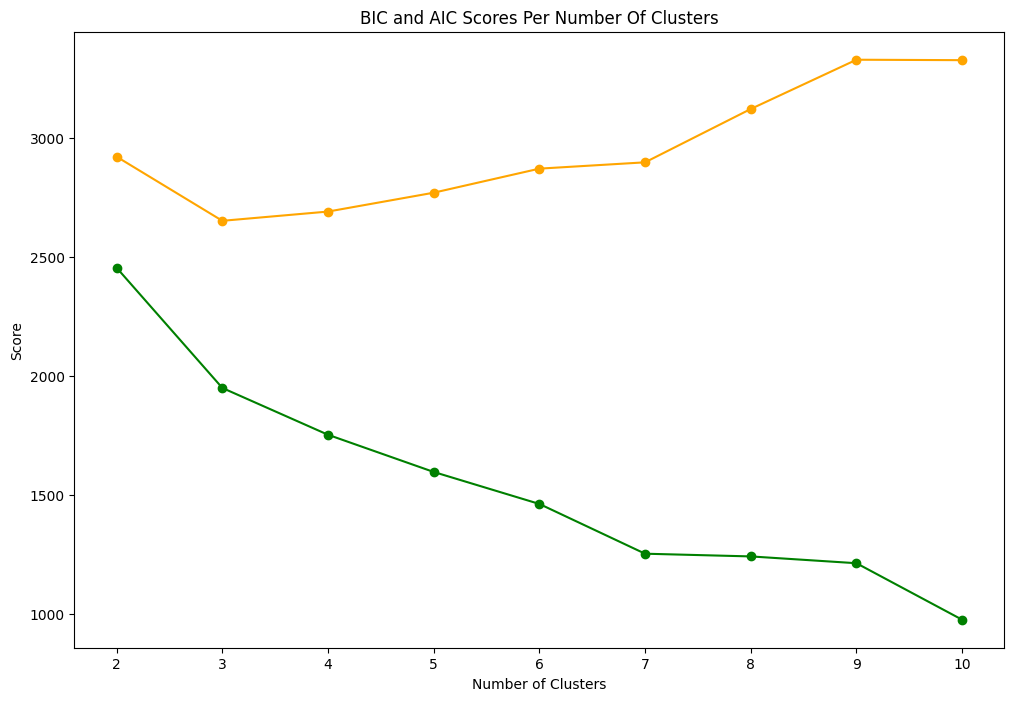

In [3]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_ft_z_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_ft_z_cl))
    aic_score.append(gm.aic(df_combined_ft_z_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')


In [33]:
n_components = 2 # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(df_combined_ft_z_cl)


covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

predictions_z = {cov_type: gmm_model.predict(df_combined_ft_z_cl)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component):
[[ 0.57408301 -0.18065241 -0.1232577  -0.32134298  0.4340395   0.30623585
  -0.08503818  0.31863345  0.30752367]
 [-0.18065241  0.32907438  0.32901329  0.18895552 -0.26794794  0.13065898
   0.25417611  0.1300451   0.13288612]
 [-0.1232577   0.32901329  0.91987818  0.06658034 -0.212738    0.04905047
   0.25900659  0.05315112  0.08604357]
 [-0.32134298  0.18895552  0.06658034  0.28071476 -0.2928055  -0.00531916
   0.18877272 -0.01312332 -0.01156881]
 [ 0.4340395  -0.26794794 -0.212738   -0.2928055   0.39576326  0.10378541
  -0.18711931  0.11285333  0.10548048]
 [ 0.30623585  0.13065898  0.04905047 -0.00531916  0.10378541  0.77694295
   0.51912984  0.76770961  0.75711796]
 [-0.08503818  0.25417611  0.25900659  0.18877272 -0.18711931  0.51912984
   0.61102616  0.50362263  0.51588854]
 [ 0.31863345  0.1300451   0.05315112 -0.01312332  0.11285333  0.76770961
   0.50362263  0.81219177  0.79222898]
 [ 0.30752367  0.13288612  0.08604357 -0.01156881  0.10548

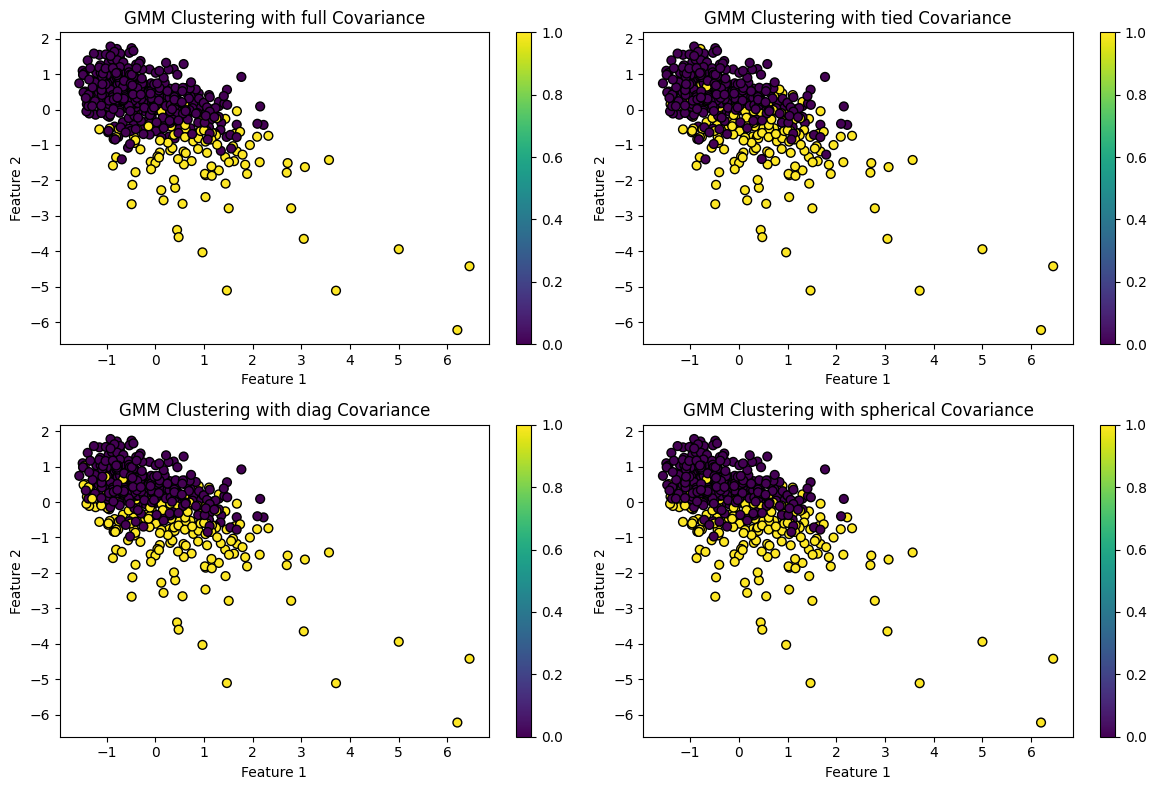

In [34]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_ft_z_cl.iloc[:, 0], df_combined_ft_z_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


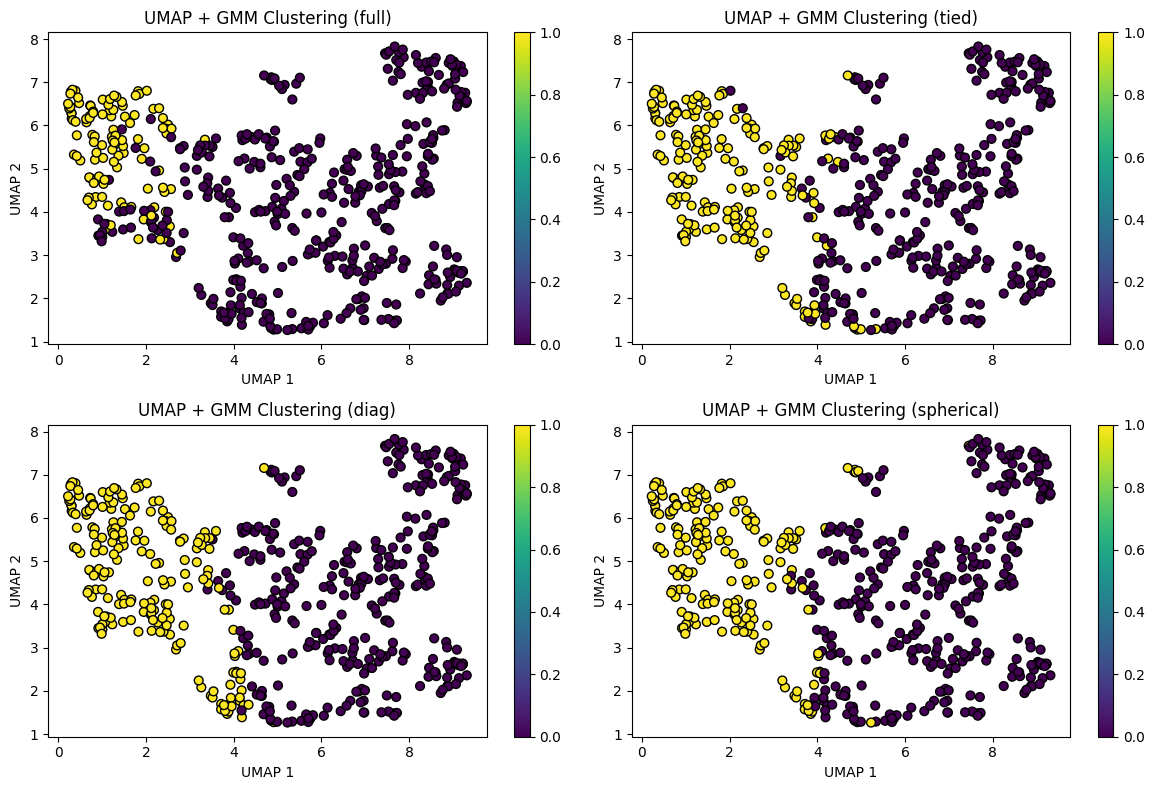

In [35]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_combined_ft_z_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_z[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()


In [36]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_ft_z_cl, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.371
Tied covariance: Silhouette Score = 0.344
Diag covariance: Silhouette Score = 0.356
Spherical covariance: Silhouette Score = 0.362


In [37]:
df_combined_ft_z['predictions_z_full'] = predictions_z['full']
df_combined_ft_z['predictions_z_tied'] = predictions_z['tied']
df_combined_ft_z['predictions_z_diag'] = predictions_z['diag']
df_combined_ft_z['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_ft_z['label'], df_combined_ft_z['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_ft_z['label'], df_combined_ft_z['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_ft_z['label'], df_combined_ft_z['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_ft_z['label'], df_combined_ft_z['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1
Label                   
higher          268    0
smaller         159  110

Contingency Table for Tied Covariance:
Cluster (tied)    0    1
Label                   
higher          263    5
smaller          78  191

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher          257   11
smaller          78  191

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher               262    6
smaller               79  190


Min-max:

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

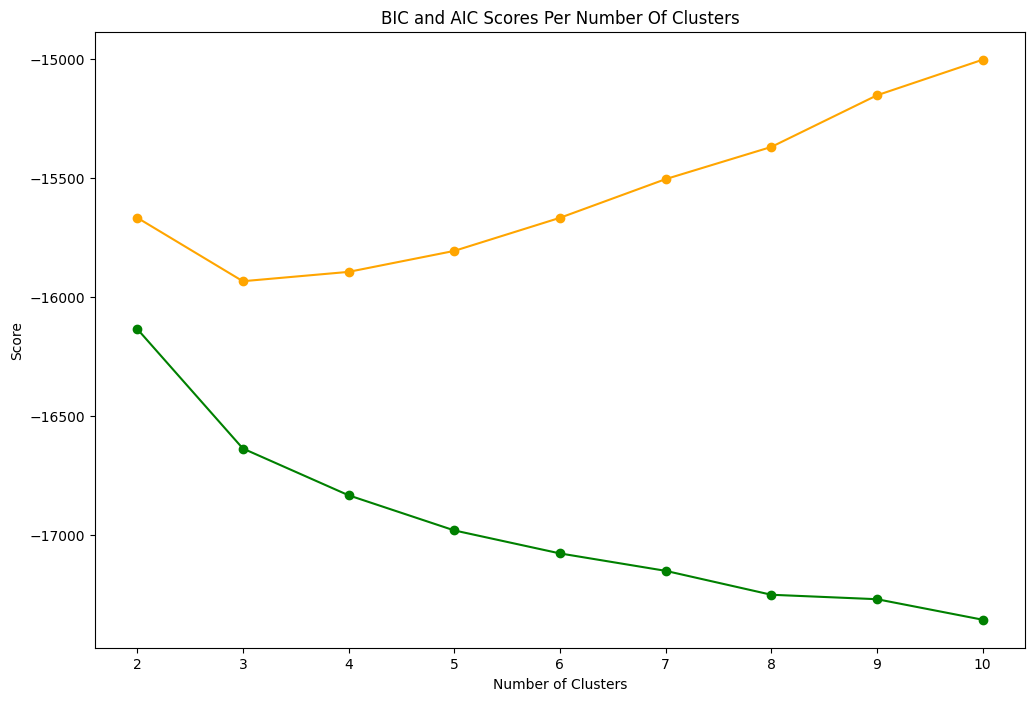

In [9]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_ft_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_ft_mm_cl))
    aic_score.append(gm.aic(df_combined_ft_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [ ]:
n_components = 3 #2 # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_combined_ft_mm_cl)


covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

predictions_mm = {cov_type: gmm_model.predict(df_combined_ft_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 0.00688016 -0.00329076 -0.00104973 -0.00554714  0.00531679  0.00208011
  -0.00210852  0.00207297  0.00181841]
 [-0.00329076  0.00558152  0.00322433  0.00477074 -0.004642    0.00551122
   0.00675681  0.00587048  0.00514346]
 [-0.00104973  0.00322433  0.00745988  0.00130227 -0.00198293  0.00111161
   0.00321842  0.00134185  0.0016027 ]
 [-0.00554714  0.00477074  0.00130227  0.00700873 -0.00552921  0.00488215
   0.00728035  0.00520322  0.00453896]
 [ 0.00531679 -0.004642   -0.00198293 -0.00552921  0.00527376 -0.00235862
  -0.00500478 -0.00258421 -0.00223429]
 [ 0.00208011  0.00551122  0.00111161  0.00488215 -0.00235862  0.02952231
   0.02387371  0.03055969  0.02665526]
 [-0.00210852  0.00675681  0.00321842  0.00728035 -0.00500478  0.02387371
   0.02351854  0.02510429  0.02229534]
 [ 0.00207297  0.00587048  0.00134185  0.00520322 -0.00258421  0.03055969
   0.02510429  0.03371558  0.0290633 ]
 [ 0.00181841  0.00514346  0.0016027   0.00453896 -0.00223

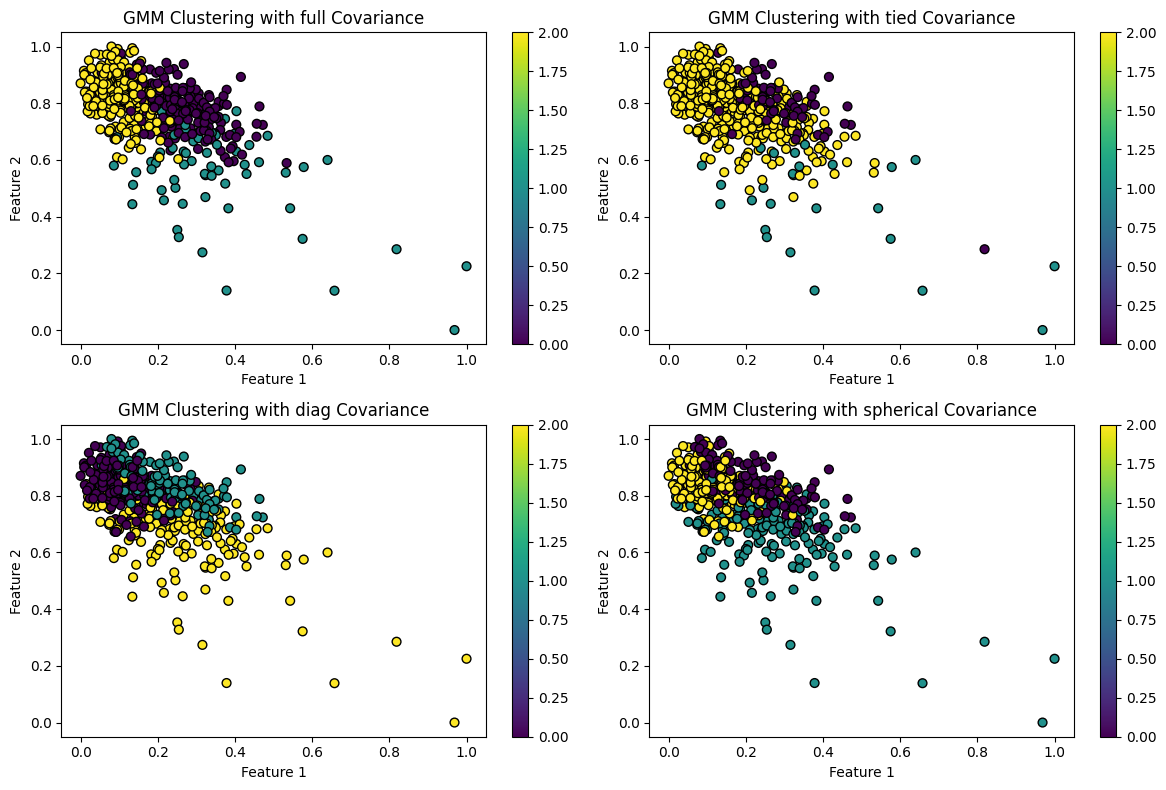

In [18]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_ft_mm_cl.iloc[:, 0], df_combined_ft_mm_cl.iloc[:, 1], c=predictions_mm[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


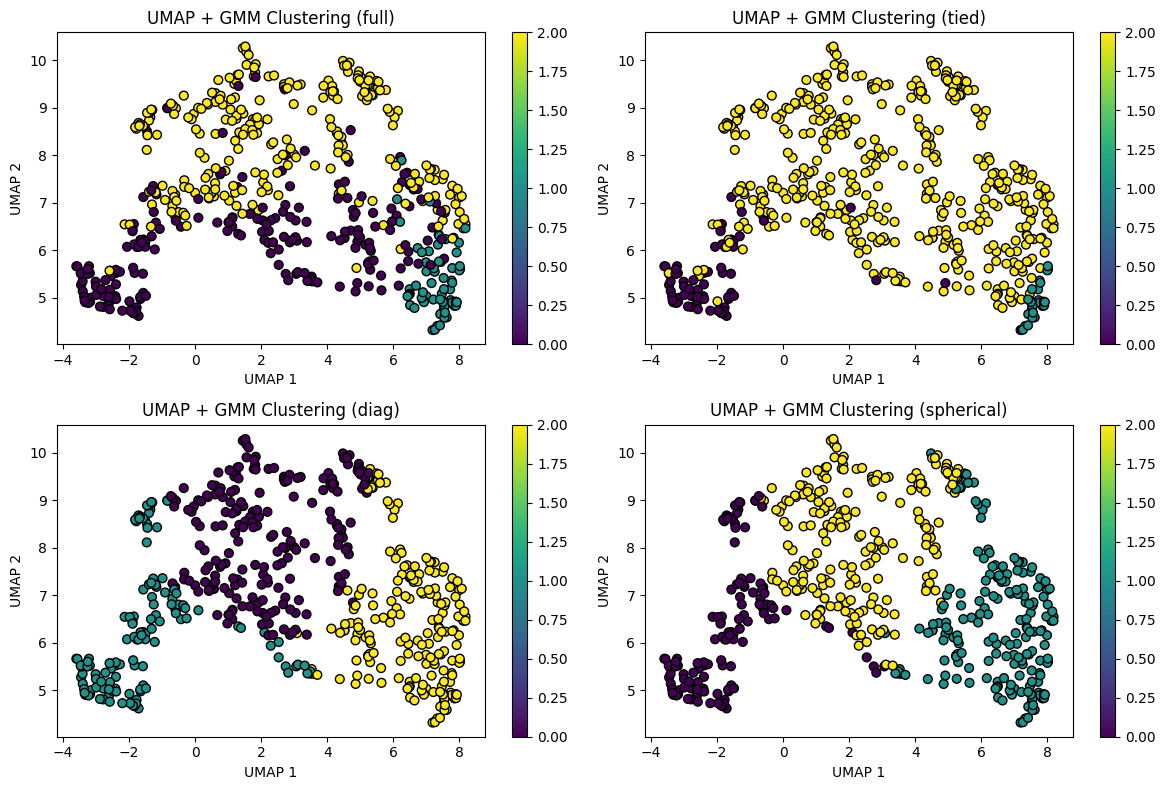

In [19]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_combined_ft_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_mm[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [20]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_ft_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.151
Tied covariance: Silhouette Score = 0.239
Diag covariance: Silhouette Score = 0.301
Spherical covariance: Silhouette Score = 0.301


In [21]:
df_combined_ft_mm['predictions_z_full'] = predictions_mm['full']
df_combined_ft_mm['predictions_z_tied'] = predictions_mm['tied']
df_combined_ft_mm['predictions_z_diag'] = predictions_mm['diag']
df_combined_ft_mm['predictions_z_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0   1    2
Label                       
higher          108   0  160
smaller         103  64  102

Contingency Table for Tied Covariance:
Cluster (tied)   0   1    2
Label                      
higher          64   0  204
smaller          7  26  236

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1    2
Label                        
higher          142  122    4
smaller          70   16  183

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1    2
Label                             
higher               124    4  140
smaller               11  184   74


In [26]:
n_components_mm_alt = 2  # Number of clusters
covariance_types_mm_alt = ['full', 'tied', 'diag', 'spherical']

# Crear modelos GMM con distintos tipos de covarianza
gmm_models_mm_alt = {
    cov_type: GaussianMixture(n_components=n_components_mm_alt, covariance_type=cov_type)
    for cov_type in covariance_types_mm_alt
}

# Ajustar los modelos a los datos
for cov_type, gmm_model in gmm_models_mm_alt.items():
    gmm_model.fit(df_combined_ft_mm_cl)

# Obtener las matrices de covarianza de cada modelo
covariances_mm_alt = {
    cov_type: gmm_model.covariances_
    for cov_type, gmm_model in gmm_models_mm_alt.items()
}

# Obtener las predicciones de cada modelo
predictions_mm_alt = {
    cov_type: gmm_model.predict(df_combined_ft_mm_cl)
    for cov_type, gmm_model in gmm_models_mm_alt.items()
}

Covariance Matrix (full - Component):
[[ 0.0089397  -0.00282947 -0.00170045 -0.00580617  0.00644679  0.00684835
  -0.00202577  0.00743209  0.00620575]
 [-0.00282947  0.00512946  0.00451791  0.00341668 -0.00398504  0.00292631
   0.00593553  0.00303072  0.00268487]
 [-0.00170045  0.00451791  0.01114548  0.00105933 -0.00278542  0.00095671
   0.00532349  0.00108025  0.00152595]
 [-0.00580617  0.00341668  0.00105933  0.00587586 -0.00504167 -0.00012316
   0.00512854 -0.00034505 -0.00025923]
 [ 0.00644679 -0.00398504 -0.00278542 -0.00504167  0.00560345  0.00220716
  -0.00418622  0.00250769  0.00202509]
 [ 0.00684835  0.00292631  0.00095671 -0.00012316  0.00220716  0.02519695
   0.01749134  0.02593926  0.02214714]
 [-0.00202577  0.00593553  0.00532349  0.00512854 -0.00418622  0.01749134
   0.02140473  0.01767369  0.01567732]
 [ 0.00743209  0.00303072  0.00108025 -0.00034505  0.00250769  0.02593926
   0.01767369  0.02859694  0.02414759]
 [ 0.00620575  0.00268487  0.00152595 -0.00025923  0.00202

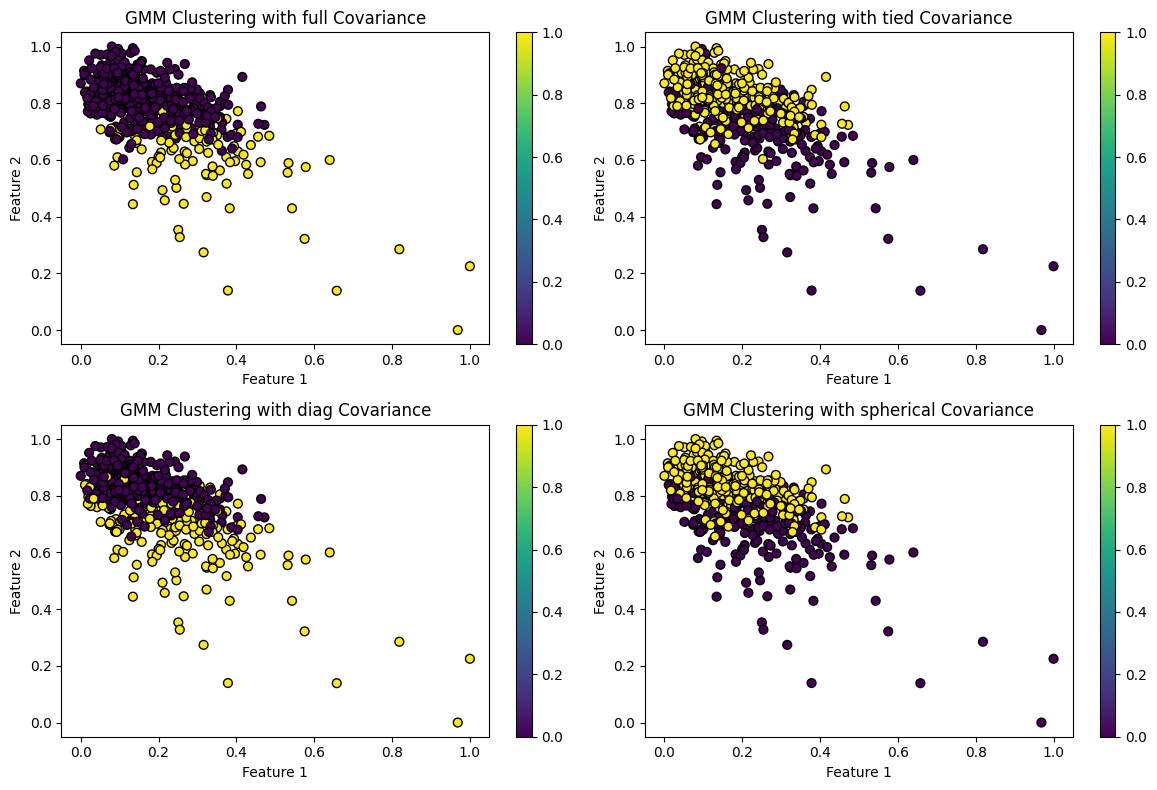

In [28]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm_alt.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_ft_mm_cl.iloc[:, 0], df_combined_ft_mm_cl.iloc[:, 1], c=predictions_mm_alt[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm_alt[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


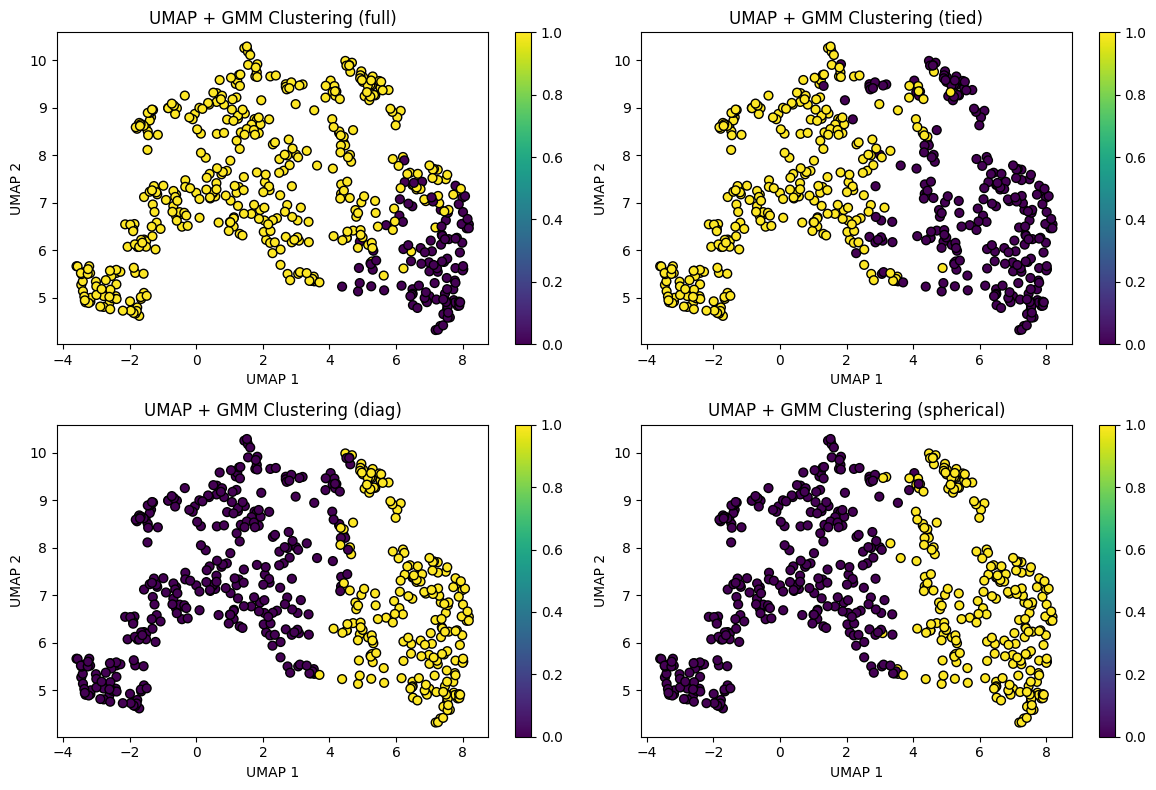

In [24]:

# Reducir dimensionalidad
reducer_mm_alt = umap.UMAP(random_state=42)
embedding_mm_alt = reducer_mm_alt.fit_transform(df_combined_ft_mm_cl)

# Graficar clustering según cada tipo de covarianza
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm_alt.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding_mm_alt[:, 0], embedding_mm_alt[:, 1], 
                c=predictions_mm_alt[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [25]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score_alt_mm = silhouette_score(df_combined_ft_mm_cl, predictions_mm_alt[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score_alt_mm:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.368
Tied covariance: Silhouette Score = 0.369
Diag covariance: Silhouette Score = 0.401
Spherical covariance: Silhouette Score = 0.399


In [32]:
df_combined_ft_mm['label']
df_combined_ft_mm_cl['predictions_alt_full'] = predictions_mm_alt['full']
df_combined_ft_mm_cl['predictions_alt_tied'] = predictions_mm_alt['tied']
df_combined_ft_mm_cl['predictions_alt_diag'] = predictions_mm_alt['diag']
df_combined_ft_mm_cl['predictions_alt_spherical'] = predictions_mm_alt['spherical']
contingency_alt_full = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm_cl['predictions_alt_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_alt_tied = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm_cl['predictions_alt_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_alt_diag = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm_cl['predictions_alt_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_alt_spherical = pd.crosstab(df_combined_ft_mm['label'], df_combined_ft_mm_cl['predictions_alt_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])
print("\nContingency Table for Full Covariance (ALT):")
print(contingency_alt_full)

print("\nContingency Table for Tied Covariance (ALT):")
print(contingency_alt_tied)

print("\nContingency Table for Diagonal Covariance (ALT):")
print(contingency_alt_diag)

print("\nContingency Table for Spherical Covariance (ALT):")
print(contingency_alt_spherical)



Contingency Table for Full Covariance (ALT):
Cluster (full)    0    1
Label                   
higher          268    0
smaller         159  110

Contingency Table for Tied Covariance (ALT):
Cluster (tied)    0    1
Label                   
higher           20  248
smaller         227   42

Contingency Table for Diagonal Covariance (ALT):
Cluster (diag)    0    1
Label                   
higher          256   12
smaller          74  195

Contingency Table for Spherical Covariance (ALT):
Cluster (spherical)    0    1
Label                        
higher                23  245
smaller              214   55
